In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/topic-modelling


/content/drive/.shortcut-targets-by-id/1a64DppFMe3ckt6BeCG2rEQ790cq2rAfr/topic-modelling


# Install libraries

In [3]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spacy



# Loading Reddit Data

In [4]:
import zipfile
import os
from glob import glob


# step 2: Define all paths to search for CSV files
search_paths = [
    "reddit_data",  # extracted zip data
    "ETH",          # ETH folder
    "BTC"           # BTC folder
]

# step 3: Find all CSV files from all sources
all_files = []
for path in search_paths:
    if os.path.exists(path):
        files_in_path = glob(os.path.join(path, "**/*.csv"), recursive=True)
        all_files.extend(files_in_path)
        print(f"Found {len(files_in_path)} files in {path}")
    else:
        print(f"Warning: Path '{path}' does not exist")

print(f"Total CSV files found: {len(all_files)}")

# step 4: Process all files
dfs = []
for f in all_files:
    # skip these files
    filename = os.path.basename(f)
    if filename in ['BTC_prices.csv', 'ETH_preprocessed.csv']:
        print(f"Skipping file: {f}")
        continue
    try:
        # read csv
        df = pd.read_csv(f)

        # determine subreddit from folder structure
        # this will work for both folder-based (ETH/BTC) and filename-based approaches
        folder_name = os.path.basename(os.path.dirname(f))

        # if the folder name is generic (like 'reddit_data'), try to extract from filename
        if folder_name in ['reddit_data', '.']:
            # extract subreddit from filename pattern like 'reddit_data_btc_2025-09-12.csv'
            filename = os.path.basename(f)
            if 'reddit_data_' in filename:
                parts = filename.replace('reddit_data_', '').split('_')
                if len(parts) > 0:
                    subreddit = parts[0]  # should be 'btc' or 'eth'
                else:
                    subreddit = 'unknown'
            else:
                subreddit = folder_name
        else:
            subreddit = folder_name.lower()  # ETH -> eth, BTC -> btc

        # add metadata columns
        df["subreddit"] = subreddit
        df["filename"] = os.path.basename(f)
        df["source_path"] = os.path.dirname(f)  # helps track where data came from

        dfs.append(df)

    except Exception as e:
        print(f"Error processing file {f}: {str(e)}")

# step 5: Combine all dataframes
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)

    print(f"\nFinal Results:")
    print(f"Total files processed: {len(dfs)}")
    print(f"Combined shape: {combined_df.shape}")

    # show breakdown by subreddit
    print(f"\nData breakdown by subreddit:")
    print(combined_df['subreddit'].value_counts())

    # show breakdown by source path
    print(f"\nData breakdown by source:")
    print(combined_df['source_path'].value_counts())



    # step 6: Split into separate DataFrames by subreddit
    # first, let's see what subreddits we actually have
    available_subreddits = combined_df['subreddit'].unique()
    print(f"\nAvailable subreddits: {list(available_subreddits)}")

    # create separate DataFrames for each subreddit
    eth_df = combined_df[combined_df['subreddit'].str.lower() == 'eth'].copy()
    btc_df = combined_df[combined_df['subreddit'].str.lower() == 'btc'].copy()
    cryptomarkets_df = combined_df[combined_df['subreddit'].str.lower() == 'cryptomarkets'].copy()

    # report on each DataFrame
    print(f"\nSeparate DataFrames created:")
    print(f"ETH DataFrame shape: {eth_df.shape}")
    print(f"BTC DataFrame shape: {btc_df.shape}")
    print(f"CryptoMarkets DataFrame shape: {cryptomarkets_df.shape}")

    # check for any data that didn't fit into the 3 main categories
    other_subreddits = combined_df[~combined_df['subreddit'].str.lower().isin(['eth', 'btc', 'cryptomarkets'])]
    if not other_subreddits.empty:
        print(f"Other subreddits found: {other_subreddits['subreddit'].unique()}")
        print(f"Other data shape: {other_subreddits.shape}")


    # save individual datasets in extracted_datasets folder
    eth_df.to_csv('extracted_datasets/eth_reddit_data.csv', index=False)
    btc_df.to_csv('extracted_datasets/btc_reddit_data.csv', index=False)
    cryptomarkets_df.to_csv('extracted_datasets/cryptomarkets_reddit_data.csv', index=False)
    combined_df.to_csv('extracted_datasets/combined_reddit_data.csv', index=False)
    print("All datasets saved to 'extracted_datasets' folder")

else:
    print("No data files were successfully processed!")
    eth_df = btc_df = cryptomarkets_df = combined_df = pd.DataFrame()

Found 24 files in reddit_data
Found 26 files in ETH
Found 26 files in BTC
Total CSV files found: 76
Skipping file: ETH/ETH_preprocessed.csv
Skipping file: BTC/BTC_prices.csv

Final Results:
Total files processed: 74
Combined shape: (62767, 8)

Data breakdown by subreddit:
subreddit
btc              25168
eth              24330
cryptomarkets    13269
Name: count, dtype: int64

Data breakdown by source:
source_path
ETH                                               21339
BTC                                               14835
reddit_data/reddit_data_6-13-Aug/CryptoMarkets    13269
reddit_data/reddit_data_6-13-Aug/btc              10333
reddit_data/reddit_data_6-13-Aug/eth               2991
Name: count, dtype: int64

Available subreddits: ['btc', 'cryptomarkets', 'eth']

Separate DataFrames created:
ETH DataFrame shape: (24330, 8)
BTC DataFrame shape: (25168, 8)
CryptoMarkets DataFrame shape: (13269, 8)
All datasets saved to 'extracted_datasets' folder


In [5]:
eth_df

,title,selftext,is_comment,score,flair,subreddit,filename,source_path
23602,Missed opp!,"I applied to take a $35,0000 loan and put it a...",False,1.0,NaN,eth,reddit_data_eth_2025-08-13.csv,reddit_data/reddit_data_6-13-Aug/eth
23603,Do I hold or sell?,I think eth has outperformed my expectations.....,False,0.0,NaN,eth,reddit_data_eth_2025-08-13.csv,reddit_data/reddit_data_6-13-Aug/eth
23604,Do I hold or sell?,Buy,True,2.0,NaN,eth,reddit_data_eth_2025-08-13.csv,reddit_data/reddit_data_6-13-Aug/eth
23605,Do I hold or sell?,You can sell it to me and I'll sell it back to...,True,1.0,NaN,eth,reddit_data_eth_2025-08-13.csv,reddit_data/reddit_data_6-13-Aug/eth
23606,ETH 🚀,How was your experience with eth?\n\nUp vote t...,False,0.0,NaN,eth,reddit_data_eth_2025-08-13.csv,reddit_data/reddit_data_6-13-Aug/eth
...,...,...,...,...,...,...,...,...
47927,Need a small amount of Sepolia ETH to deploy m...,"Hi everyone, \n\nI'm currently learning Ether...",False,1.0,NaN,eth,reddit_data_eth_2025-08-22.csv,ETH
47928,Starting to buy aigain,Bought 4 eth today at 2510. I'll buy more this...,False,2.0,NaN,eth,reddit_data_eth_2025-08-22.csv,ETH
47929,Starting to buy aigain,Cool story,True,4.0,NaN,eth,reddit_data_eth_2025-08-22.csv,ETH
47930,Starting to buy aigain,Starting to Love again?,True,1.0,NaN,eth,reddit_data_eth_2025-08-22.csv,ETH


In [6]:
btc_df

,title,selftext,is_comment,score,flair,subreddit,filename,source_path
0,NaN,Cryptonomicon by Neal Stephenson.\n\nI maintai...,True,1.0,NaN,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc
1,How much % of your portfolio (Stocks and crypt...,For me its 20% (and it grows),False,13.0,⌨ Discussion,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc
2,How much % of your portfolio (Stocks and crypt...,80/20,True,2.0,⌨ Discussion,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc
3,How much % of your portfolio (Stocks and crypt...,For me only 21% but aiming for 60-80% at least,True,2.0,⌨ Discussion,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc
4,How much % of your portfolio (Stocks and crypt...,Have 25% in BTC,True,2.0,⌨ Discussion,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc
...,...,...,...,...,...,...,...,...
62762,The New Bitcoin for Gen Z - SPX6900?,"Literally a dime a dozen, alt coin. Might pump...",True,2.0,NaN,btc,reddit_data_btc_2025-09-04.csv,BTC
62763,The New Bitcoin for Gen Z - SPX6900?,Why open a reddit account just for advertising...,True,2.0,NaN,btc,reddit_data_btc_2025-09-04.csv,BTC
62764,The New Bitcoin for Gen Z - SPX6900?,Shitcoin is still a shitcoin.,True,2.0,NaN,btc,reddit_data_btc_2025-09-04.csv,BTC
62765,The New Bitcoin for Gen Z - SPX6900?,Cypherpunk*,True,1.0,NaN,btc,reddit_data_btc_2025-09-04.csv,BTC


In [7]:
cryptomarkets_df

,title,selftext,is_comment,score,flair,subreddit,filename,source_path
10333,"Buy/Sell Signals, are they any good ?","Sorry if the question is trivial, I'm new to c...",False,0.0,DISCUSSION,cryptomarkets,reddit_data_CryptoMarkets_2025-08-11.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets
10334,"Buy/Sell Signals, are they any good ?",Markets are not deterministic or we would all ...,True,1.0,DISCUSSION,cryptomarkets,reddit_data_CryptoMarkets_2025-08-11.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets
10335,Crypto in 401k - this is HUGE,Literally read this 2 minutes ago — [https://w...,False,26.0,Sentiment,cryptomarkets,reddit_data_CryptoMarkets_2025-08-11.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets
10336,Crypto in 401k - this is HUGE,Reading Friday's news on Monday?\n\n\nNgmi,True,20.0,Sentiment,cryptomarkets,reddit_data_CryptoMarkets_2025-08-11.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets
10337,Crypto in 401k - this is HUGE,Just another shoddy way for people with huge m...,True,10.0,Sentiment,cryptomarkets,reddit_data_CryptoMarkets_2025-08-11.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets
...,...,...,...,...,...,...,...,...
23597,Should I buy ETH now?/What crypto should I buy...,spx 6900,True,1.0,SUPPORT - OPEN,cryptomarkets,reddit_data_CryptoMarkets_2025-08-08.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets
23598,Should I buy ETH now?/What crypto should I buy...,Bitcoin is the only one you should consider.,True,1.0,SUPPORT - OPEN,cryptomarkets,reddit_data_CryptoMarkets_2025-08-08.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets
23599,Should I buy ETH now?/What crypto should I buy...,If you want big gains with your low budget - S...,True,1.0,SUPPORT - OPEN,cryptomarkets,reddit_data_CryptoMarkets_2025-08-08.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets
23600,Should I buy ETH now?/What crypto should I buy...,If you want to gamble on good technology get a...,True,0.0,SUPPORT - OPEN,cryptomarkets,reddit_data_CryptoMarkets_2025-08-08.csv,reddit_data/reddit_data_6-13-Aug/CryptoMarkets


### understanding our texts

In [8]:
analysis_df = combined_df.copy()

# count words in selftext
analysis_df['text_word_count'] = combined_df['selftext'].apply(lambda x: len(str(x).split()))

# count words in title
analysis_df['title_word_count'] = combined_df['title'].apply(lambda x: len(str(x).split()))


In [9]:
analysis_df.describe()

,score,text_word_count,title_word_count
count,62767.000000,62767.000000,62767.000000
mean,3.792152,28.702168,9.546943
std,19.635764,61.642105,6.954298
min,-52.000000,0.000000,1.000000
25%,1.000000,5.000000,5.000000
50%,1.000000,13.000000,7.000000
75%,2.000000,30.000000,12.000000
max,2270.000000,3666.000000,52.000000


For short texts especially the titles, removing stopwords can cause them to lose crucial meaning?


**distribution of `is_comment`**

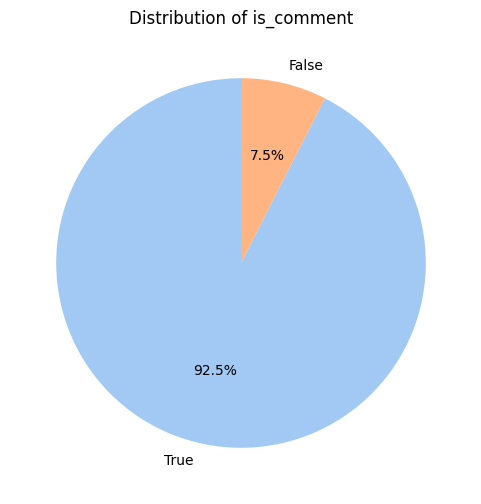

In [10]:

# Pie chart for is_comment
plt.figure(figsize=(6, 6))
analysis_df['is_comment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Distribution of is_comment")
plt.ylabel("")  # hide y-label
plt.show()


**distribution of `subreddit`**

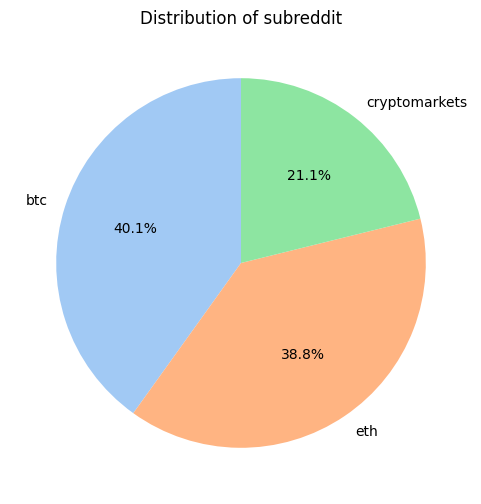

In [11]:
# pie chart for subreddit
plt.figure(figsize=(6, 6))
analysis_df['subreddit'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel", len(analysis_df['subreddit'].unique()))
)
plt.title("Distribution of subreddit")
plt.ylabel("")
plt.show()


**distribution of `flair`**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128059 (\N{BEAR FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10071 (\N{HEAVY EXCLAMATION MARK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

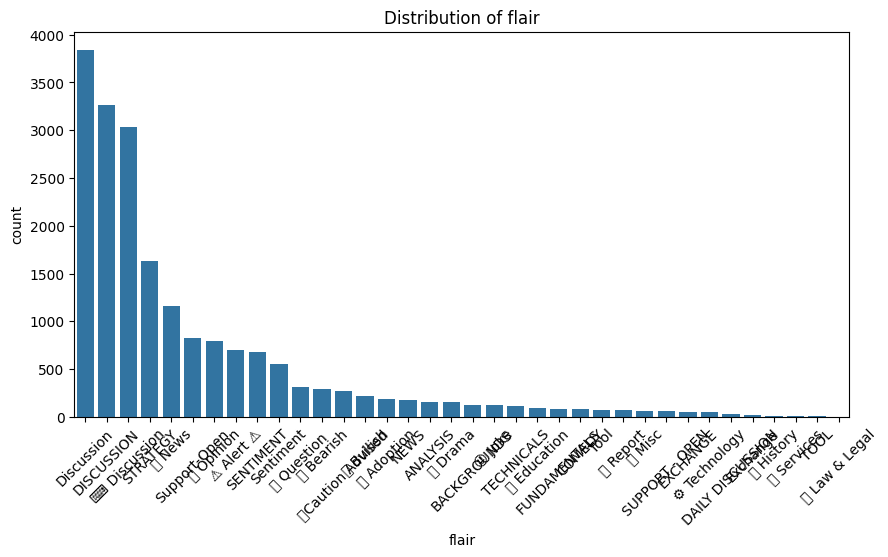

In [12]:
# barplot for flair
plt.figure(figsize=(10, 5))
sns.countplot(data=analysis_df, x='flair', order=analysis_df['flair'].value_counts().index)
plt.title("Distribution of flair")
plt.xticks(rotation=45)
plt.show()

## filtering for relevant comments/posts only

created a pipeline to process raw Reddit data (posts and comments)
- extract and filter cryptocurrency-related content
- currently looks for relevant ETH and BTC content

**steps taken:**

1. **Date Extraction**: extracts dates from CSV filenames
2. **Text Preparation**: combines title and content based on post type
3. **Content Filtering**: identifies relevant cryptocurrency discussions using keyword-based filtering
4. **Subreddit Processing**: handles posts/comments from `cryptomarkets` subreddit by splitting content based on mentioned cryptocurrencies


**relevant functions:**
1.  `extract_date_from_filename(filename)`

extracts date information from CSV filenames using regex pattern matching.

**Input**: filename like `'reddit_data_btc_2025-09-12.csv'`  
**Output**: pandas datetime object or None if no date pattern found  
**Pattern**: looks for `YYYY-MM-DD` format in filename


2. `prepare_text_for_analysis(row)`

combines title and selftext fields based on content characteristics.


- **Comments**: Uses only selftext (title is from parent post)
- **Short/link posts**: Uses title only if selftext is <20 chars or starts with 'http'
- **Substantial content**: Combines title and selftext if both are meaningful
- **Default**: Uses whichever field is longer


3. `is_relevant_crypto_content_basic(text, subreddit)`

basic keyword-based filtering for cryptocurrency-related content

**Includes** posts with:
- Crypto keywords: bitcoin, btc, ethereum, eth, crypto, blockchain, mining, hodl, etc.
- Trading keywords: market, price, trading, invest, buy, sell, portfolio, etc.
- Technical analysis terms: support, resistance, volume, rally, crash, etc.

**Excludes** posts with:
- Spam indicators: subscribe, telegram, giveaway, etc.
- Very short content (<5 words)

4. `is_relevant_crypto_content_advanced(text, subreddit)`

enhanced filtering with pattern recognition and weighted scoring

Additional features:
- Named entity recognition for crypto-specific entities
- Financial context detection using regex patterns
- Price/number discussion identification
- Low-effort comment filtering (single words like "thanks", "lol")
- Weighted relevance scoring system

Scoring weights:
- Crypto entities: 2.0x
- Financial context: 1.5x
- Price discussions: 1.0x
- Minimum threshold: 1.0 for relevance

5. `filter_cryptomarkets_for_btc_eth(df)`

processes the generic 'cryptomarkets' subreddit to separate BTC and ETH discussions.

1. Identifies posts mentioning BTC keywords (bitcoin, btc)
2. Identifies posts mentioning ETH keywords (ethereum, eth, ether)
3. Creates separate entries for posts mentioning both cryptocurrencies
4. Renames subreddit to `cryptomarkets_btc` or `cryptomarkets_eth`
5. Removes posts that don't mention either cryptocurrency



In [13]:

import re
from datetime import datetime

def extract_date_from_filename(filename):
    """Extract date from filename like 'reddit_data_btc_2025-09-12.csv'"""
    date_pattern = r'(\d{4}-\d{2}-\d{2})'
    match = re.search(date_pattern, filename)
    if match:
        return pd.to_datetime(match.group(1))
    return None

def prepare_text_for_analysis(row):
    """Smart text preparation based on content type."""

    # extract title and selftext, handling missing values
    title = str(row['title']).strip() if pd.notna(row['title']) else ""
    selftext = str(row['selftext']).strip() if pd.notna(row['selftext']) else ""

    # for comments, only use selftext (title is from the parent post)
    if row['is_comment']:
        return selftext

    # for posts, decide whether to combine title and selftext
    # if selftext is very short or just a link, use title only
    if len(selftext) < 20 or selftext.startswith('http'):
        return title

    # if both title and selftext have substantial content, combine them
    if len(title) > 10 and len(selftext) > 20:
        return f"{title} {selftext}"

    # Default: return the longer of the title or selftext
    return title if len(title) > len(selftext) else selftext


def prepend_price_outlook(text, coin):
        if coin:
            price_outlook_section = f"{coin} price outlook: "
            return price_outlook_section + text
        return text

# very basic filtering.
def is_relevant_crypto_content_basic(text, subreddit):
    """Basic keyword-based filtering"""
    if pd.isna(text) or text.strip() == "":
        return False

    text_lower = text.lower()

    # crypto-related keywords
    crypto_keywords = [
        'bitcoin', 'btc', 'ethereum', 'eth', 'crypto', 'blockchain',
        'mining', 'hodl', 'whale', 'pump', 'dump', 'bull', 'bear',
        'market', 'price', 'trading', 'invest', 'buy', 'sell',
        'moon', 'lambo', 'dip', 'ath', 'support', 'resistance',
        'volume', 'rally', 'crash', 'correction', 'halving'
    ]

    # finance/trading keywords
    finance_keywords = [
        'portfolio', 'profit', 'loss', 'gain', 'return', 'roi',
        'analysis', 'prediction', 'forecast', 'signal', 'indicator',
        'technical', 'fundamental', 'chart', 'pattern', 'trend'
    ]

    # check if text contains relevant keywords
    has_crypto_words = any(word in text_lower for word in crypto_keywords)
    has_finance_words = any(word in text_lower for word in finance_keywords)

    # Additional filters - remove obvious spam/irrelevant content
    spam_indicators = [
        'subscribe', 'like and subscribe', 'follow me', 'telegram',
        'discord', 'join our', 'check out my', 'click here',
        'free coins', 'airdrop', 'giveaway'
    ]

    has_spam = any(spam in text_lower for spam in spam_indicators)

    # Tto short posts are often not useful
    is_too_short = len(text.split()) < 5

    # final relevance score
    is_relevant = (has_crypto_words or has_finance_words) and not has_spam and not is_too_short

    return is_relevant

def is_relevant_crypto_content_advanced(text, subreddit):
    """Advanced filtering with patterns and entity recognition"""
    if pd.isna(text) or text.strip() == "":
        return False

    # first pass: basic keyword check
    if not is_relevant_crypto_content_basic(text, subreddit):
        return False

    text_lower = text.lower()

    # NER (look for crypto entities)
    crypto_entities = ['bitcoin', 'btc', 'ethereum', 'eth', 'satoshi', 'vitalik', 'coinbase', 'binance']
    has_crypto_entities = any(entity in text_lower for entity in crypto_entities)

    # financial sentiment indicators using regex
    financial_context = [
        r'\$\d+', r'\d+k', r'\d+%', r'\bgains?\b', r'\blosses?\b', r'\bprofits?\b',
        r'\bbull(ish)?\b', r'\bbear(ish)?\b', r'\blong\b', r'\bshort\b'
    ]

    has_financial_context = any(re.search(pattern, text_lower) for pattern in financial_context)

    # check for price/number discussions
    has_price_talk = bool(re.search(r'(\$\d+|\d+\.\d+|\d+k|\d+%)', text))

    # remove common irrelevant patterns (low effort comments)
    irrelevant_patterns = [
        r'^thanks?!*$', r'^this!*$', r'^lol!*$', r'^lmao!*$',
        r'^nice!*$', r'^great!*$', r'^awesome!*$', r'^agreed?!*$',
        r'^exactly!*$', r'^wrong!*$', r'^\+1!*$'
    ]

    is_low_effort = any(re.match(pattern, text_lower.strip()) for pattern in irrelevant_patterns)

    if is_low_effort:
        return False

    # combine all signals with weights
    relevance_score = sum([
        has_crypto_entities * 2,  # Strong indicator
        has_financial_context * 1.5,
        has_price_talk * 1,
    ])

    # final decision
    is_relevant = relevance_score >= 1.0

    return is_relevant


# handle cryptomarkets subreddit
def filter_cryptomarkets_for_btc_eth(df):
    """Filter cryptomarkets posts to only include those mentioning BTC/ETH"""
    if 'cryptomarkets' not in df['subreddit'].str.lower().values:
        return df

    crypto_df = df[df['subreddit'].str.lower() == 'cryptomarkets'].copy()
    other_df = df[df['subreddit'].str.lower() != 'cryptomarkets'].copy()

    if len(crypto_df) == 0:
        return other_df

    # check if cryptomarkets posts mention BTC or ETH
    btc_keywords = ['bitcoin', 'btc']
    eth_keywords = ['ethereum', 'eth', 'ether']

    def get_crypto_mention(text):
        text_lower = text.lower()
        has_btc = any(word in text_lower for word in btc_keywords)
        has_eth = any(word in text_lower for word in eth_keywords)

        if has_btc and has_eth:
            return 'both'  # We'll duplicate this row
        elif has_btc:
            return 'btc'
        elif has_eth:
            return 'eth'
        else:
            return 'neither'

    crypto_df['crypto_mention'] = crypto_df['full_text'].apply(get_crypto_mention)

    # filter out posts that don't mention BTC or ETH
    relevant_crypto = crypto_df[crypto_df['crypto_mention'] != 'neither'].copy()

    # for posts mentioning both, we'll create separate entries
    both_mentions = relevant_crypto[relevant_crypto['crypto_mention'] == 'both'].copy()

    if len(both_mentions) > 0:
        # create BTC version
        btc_version = both_mentions.copy()
        btc_version['subreddit'] = 'cryptomarkets_btc'

        # create ETH version
        eth_version = both_mentions.copy()
        eth_version['subreddit'] = 'cryptomarkets_eth'

        # single mentions
        single_btc = relevant_crypto[relevant_crypto['crypto_mention'] == 'btc'].copy()
        single_btc['subreddit'] = 'cryptomarkets_btc'

        single_eth = relevant_crypto[relevant_crypto['crypto_mention'] == 'eth'].copy()
        single_eth['subreddit'] = 'cryptomarkets_eth'

        # combine all
        filtered_crypto = pd.concat([btc_version, eth_version, single_btc, single_eth], ignore_index=True)
    else:
        # no posts mentioning both, just rename single mentions
        relevant_crypto.loc[relevant_crypto['crypto_mention'] == 'btc', 'subreddit'] = 'cryptomarkets_btc'
        relevant_crypto.loc[relevant_crypto['crypto_mention'] == 'eth', 'subreddit'] = 'cryptomarkets_eth'
        filtered_crypto = relevant_crypto

    # drop the helper column
    filtered_crypto = filtered_crypto.drop('crypto_mention', axis=1)

    print(f"CryptoMarkets: kept {len(filtered_crypto)} relevant posts out of {len(crypto_df)} total")

    # combine with other subreddits
    return pd.concat([other_df, filtered_crypto], ignore_index=True)

def preprocess_dataframe(df, coinname="BTC", filtering_method='advanced'):
    """
    Main preprocessing function

    Args:
        df: Raw dataframe with reddit data
        filtering_method: 'basic' or 'advanced'

    Returns:
        Preprocessed dataframe with relevant content only
    """
    print("Starting preprocessing...")
    print(f"Input: {len(df)} total posts/comments")

    # step 1: Extract dates from filenames
    print("Extracting dates...")
    df['date'] = df['filename'].apply(extract_date_from_filename)

    # step 2: text preparation
    print("Preparing text for analysis...")
    df['full_text'] = df.apply(prepare_text_for_analysis, axis=1)

    # step 3: Filter relevant content
    print(f"Filtering relevant content using '{filtering_method}' method...")
    if filtering_method == 'basic':
        df['is_relevant'] = df.apply(
            lambda row: is_relevant_crypto_content_basic(row['full_text'], row['subreddit']),
            axis=1
        )
    else:  # advanced
        df['is_relevant'] = df.apply(
            lambda row: is_relevant_crypto_content_advanced(row['full_text'], row['subreddit']),
            axis=1
        )


    relevant_df = df[df['is_relevant']].copy()

    # now we prepend context
    relevant_df['full_text'] = relevant_df.apply(lambda row: prepend_price_outlook(row['full_text'], coin=coinname), axis=1)

    print(f"Kept {len(relevant_df)} relevant posts out of {len(df)} total")

    # step 4: Handle cryptomarkets posts
    print("Processing cryptomarkets posts...")
    final_df = filter_cryptomarkets_for_btc_eth(relevant_df)

    print(f"Final preprocessed dataset: {len(final_df)} posts")
    print(f"Subreddit breakdown:")
    print(final_df['subreddit'].value_counts())

    return final_df



In [14]:
preprocessed_btc_df = preprocess_dataframe(btc_df, coinname='BTC', filtering_method='advanced')
preprocessed_eth_df = preprocess_dataframe(eth_df, coinname='ETH', filtering_method='advanced')
preprocessed_cryptomarkets_df = preprocess_dataframe(cryptomarkets_df, coinname='Crypto', filtering_method='advanced')

# now merging the above
preprocessed_df = pd.concat([preprocessed_btc_df, preprocessed_eth_df, preprocessed_cryptomarkets_df], ignore_index=True)

preprocessed_df.to_csv('extracted_datasets/preprocessed_reddit_data.csv', index=False)

Starting preprocessing...
Input: 25168 total posts/comments
Extracting dates...
Preparing text for analysis...
Filtering relevant content using 'advanced' method...
Kept 10733 relevant posts out of 25168 total
Processing cryptomarkets posts...
Final preprocessed dataset: 10733 posts
Subreddit breakdown:
subreddit
btc    10733
Name: count, dtype: int64
Starting preprocessing...
Input: 24330 total posts/comments
Extracting dates...
Preparing text for analysis...
Filtering relevant content using 'advanced' method...
Kept 9203 relevant posts out of 24330 total
Processing cryptomarkets posts...
Final preprocessed dataset: 9203 posts
Subreddit breakdown:
subreddit
eth    9203
Name: count, dtype: int64
Starting preprocessing...
Input: 13269 total posts/comments
Extracting dates...
Preparing text for analysis...
Filtering relevant content using 'advanced' method...
Kept 4806 relevant posts out of 13269 total
Processing cryptomarkets posts...
CryptoMarkets: kept 4630 relevant posts out of 4806 

## full signal detection and aggregation pipeline

created a class `CryptoSignalDetector` to handle the entire pipeline


the steps taken are as follows:


1.  **Setup and Initialization**
- Initialize with choice of transformer model (`bart`, `deberta`, `roberta`, `distilbert`)
- Load selected zero-shot classification model with GPU support if available
- Configure model-specific paths and settings

2. **Enhanced Relevance Filtering**
- Filter posts for crypto trading relevance using keyword detection
- Check for crypto mentions (bitcoin, btc, ethereum, eth, crypto)
- Identify trading context (buy/sell signals, market sentiment, technical analysis)
- Detect financial patterns ($100, 50%, 10k, 5x)
- Remove spam/promotional content

3. **Feature Extraction**
- Extract rule-based trading signal features from text
- Count buy signals (buy, accumulate, bullish, moon, pump)
- Count sell signals (sell, dump, bearish, crash, exit)
- Count hold signals (hold, hodl, diamond hands)
- Track urgency indicators and confidence words

4. **Zero-Shot Classification**
- Use transformer model for direct buy/hold/sell/neutral classification
- Process texts in batches for efficiency
- Handle model errors with fallback classifications
- Extract confidence scores from model predictions

5. **Hybrid Signal Classification**
- Combine rule-based features (20% weight) with model predictions (80% weight)
- Use weighted voting system to determine final signal
- Calculate confidence scores based on dominant signal strength
- Store detailed model predictions for analysis

6. **Daily Signal Aggregation**
- Group individual post signals by date
- Weight signals by engagement score and confidence
- Calculate daily ratios for each signal type (buy/sell/hold/neutral)
- Determine dominant daily signal with strength metric



In [15]:
from datetime import datetime
import re
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import torch
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

class CryptoSignalDetector:
    def __init__(self, model_name='bart'):
        self.models = {}
        self.selected_model = model_name
        self.load_selected_model(model_name)

    def load_selected_model(self, model_name):
        """Load only the selected model for classification"""
        print(f"Loading {model_name} model for direct buy/hold/sell classification...")
        device = 0 if torch.cuda.is_available() else -1

        model_configs = {
            'bart': {
                'name': 'BART-Large-MNLI',
                'model_path': 'facebook/bart-large-mnli'
            },
            'deberta': {
                'name': 'DeBERTa-v3-Large-MNLI',
                'model_path': 'microsoft/deberta-v3-large-mnli'
            },
            'roberta': {
                'name': 'RoBERTa-Large-MNLI',
                'model_path': 'roberta-large-mnli'
            },
            'distilbert': {
                'name': 'DistilBERT-Base-MNLI',
                'model_path': 'typeform/distilbert-base-uncased-mnli'
            }
        }

        if model_name not in model_configs:
            raise ValueError(f"Model '{model_name}' not supported. Choose from: {list(model_configs.keys())}")

        config = model_configs[model_name]
        print(f"Loading {config['name']}...")

        try:
            self.models[model_name] = pipeline(
                "zero-shot-classification",
                model=config['model_path'],
                device=device
            )
            print(f"✓ {config['name']} loaded successfully!")
        except Exception as e:
            print(f"✗ Failed to load {config['name']}: {e}")
            raise

        self.selected_model = model_name
        print(f"Active model: {config['name']}")

    # more keyword based filtering
    def enhanced_relevance_filter(self, df):
        """Enhanced filtering for crypto trading relevance"""

        def is_trading_relevant(row):
            text = str(row['title']) + " " + str(row['selftext'])
            text = text.lower().strip()

            if len(text) < 10:
                return False

            # xore crypto mentions
            crypto_coins = ['bitcoin', 'btc', 'ethereum', 'eth', 'crypto']
            has_crypto = any(coin in text for coin in crypto_coins)

            if not has_crypto:
                return False

            # trading/investment signals
            trading_signals = [
                # direct actions
                'buy', 'sell', 'hold', 'hodl', 'accumulate', 'dump',
                # market sentiment
                'bullish', 'bearish', 'moon', 'crash', 'pump', 'dip',
                # technical analysis
                'support', 'resistance', 'breakout', 'pattern', 'chart',
                # investment terms
                'investment', 'portfolio', 'profit', 'loss', 'gains',
                # price discussions
                'price', 'target', 'prediction', 'forecast', 'rally'
            ]

            has_trading_context = any(signal in text for signal in trading_signals)

            # financial patterns (prices, percentages)
            has_financial_pattern = bool(re.search(r'(\$\d+|\d+%|\d+k|\d+x)', text))

            # exclude spam/irrelevant
            spam_patterns = [
                'subscribe', 'telegram', 'discord', 'airdrop',
                'giveaway', 'follow me', 'check my profile'
            ]
            has_spam = any(spam in text for spam in spam_patterns)

            # final relevance check
            is_relevant = (has_trading_context or has_financial_pattern) and not has_spam

            return is_relevant

        print(f"Filtering {len(df)} posts for trading relevance...")
        df['is_relevant'] = df.apply(is_trading_relevant, axis=1)
        filtered_df = df[df['is_relevant']].copy()
        print(f"Kept {len(filtered_df)} relevant posts ({len(filtered_df)/len(df)*100:.1f}%)")

        return filtered_df

   # rule-based (backup in case models don't work)
    def extract_signal_features(self, text):
        """Extract trading signal features from text"""
        text_lower = text.lower()

        features = {
            # direct buy signals
            'buy_signals': sum([
                text_lower.count(word) for word in
                ['buy', 'buying', 'accumulate', 'long', 'bullish', 'moon', 'pump']
            ]),

            # direct sell signals
            'sell_signals': sum([
                text_lower.count(word) for word in
                ['sell', 'selling', 'dump', 'short', 'bearish', 'crash', 'exit']
            ]),

            # hold signals
            'hold_signals': sum([
                text_lower.count(word) for word in
                ['hold', 'hodl', 'diamond hands', 'keep', 'maintain']
            ]),

            # urgency indicators
            'urgency': sum([
                text_lower.count(word) for word in
                ['now', 'today', 'asap', 'quickly', 'immediately']
            ]),

            # confidence indicators
            'confidence_words': sum([
                text_lower.count(word) for word in
                ['definitely', 'certainly', 'guaranteed', 'sure', 'confident']
            ]),

            # risk warnings
            'risk_warnings': sum([
                text_lower.count(phrase) for phrase in
                ['dyor', 'not financial advice', 'nfa', 'risk', 'careful']
            ])
        }

        return features

    def classify_with_single_model(self, texts, batch_size=8):
        """Use the selected model for direct buy/hold/sell classification"""

        # more specific and detailed labels for better classification
        candidate_labels = [
            'buy cryptocurrency recommendation',
            'sell cryptocurrency recommendation',
            'hold cryptocurrency recommendation',
            'neutral cryptocurrency discussion'
        ]

        # # another attempt (simpler labels)
        # candidate_labels = ['buy cryptoccurrency', 'sell cryptocurrency', 'hold cryptocurrency', 'neutral']

        model = self.models[self.selected_model]
        print(f"Running classification with {self.selected_model}...")

        results = self._run_zero_shot_batch(model, texts, candidate_labels, batch_size)

        return results

    def _run_zero_shot_batch(self, model, texts, candidate_labels, batch_size):
        """Helper function to run zero-shot classification in batches"""
        results = []
        total_batches = (len(texts) + batch_size - 1) // batch_size

        for batch_idx in range(0, len(texts), batch_size):
            batch = texts[batch_idx:batch_idx+batch_size]
            current_batch = (batch_idx // batch_size) + 1

            if current_batch % 10 == 0 or current_batch == total_batches:
                print(f"  Processing batch {current_batch}/{total_batches}...")

            try:
                batch_results = model(batch, candidate_labels)
                if isinstance(batch_results, dict):
                    batch_results = [batch_results]
                results.extend(batch_results)
            except Exception as e:
                print(f"Zero-shot classification error: {e}")
                # Fallback to neutral
                fallback = {'labels': candidate_labels, 'scores': [0.25, 0.25, 0.25, 0.25]}
                results.extend([fallback] * len(batch))

        print(f"  Completed {len(results)} classifications")
        return results

  # model classification
    def single_model_classification(self, df):
        """Classification using only the selected model + rules"""
        print(f"Running classification with {self.selected_model} model...")

        # prepare texts
        df['full_text'] = df['title'].fillna('') + ' ' + df['selftext'].fillna('')
        texts = df['full_text'].tolist()

        # extract rule-based features
        print("Extracting rule-based features...")
        rule_features = [self.extract_signal_features(text) for text in texts]

        # single model classification
        model_results = self.classify_with_single_model(texts)

        # combine model + rule results
        signals = []
        confidences = []
        model_predictions = []

        for i in range(len(texts)):
            # rule-based vote (lower weight)
            rule_weight = 0.2  # reduced weight for rules
            buy_votes = 0
            sell_votes = 0
            hold_votes = 0
            neutral_votes = 0

            # rule-based signals
            if rule_features[i]['buy_signals'] > rule_features[i]['sell_signals'] and rule_features[i]['buy_signals'] > rule_features[i]['hold_signals']:
                buy_votes += rule_weight
            elif rule_features[i]['sell_signals'] > rule_features[i]['buy_signals'] and rule_features[i]['sell_signals'] > rule_features[i]['hold_signals']:
                sell_votes += rule_weight
            elif rule_features[i]['hold_signals'] > 0:
                hold_votes += rule_weight
            else:
                neutral_votes += rule_weight

            # model prediction (higher weight)
            if i < len(model_results) and model_results[i]:
                top_label = model_results[i]['labels'][0]
                top_score = model_results[i]['scores'][0]

                # store all model predictions for debugging
                model_predictions_dict = {
                    f'{self.selected_model}_top_label': top_label,
                    f'{self.selected_model}_top_score': top_score,
                    f'{self.selected_model}_all_scores': dict(zip(model_results[i]['labels'], model_results[i]['scores'])),
                    'rule_features': rule_features[i]
                }

                # convert labels to signals with model weight
                model_weight = top_score  # use confidence as weight

                if 'buy' in top_label.lower():
                    buy_votes += model_weight
                elif 'sell' in top_label.lower():
                    sell_votes += model_weight
                elif 'hold' in top_label.lower():
                    hold_votes += model_weight
                else:  # neutral
                    neutral_votes += model_weight

                total_votes = buy_votes + sell_votes + hold_votes + neutral_votes

                # determine final signal
                if total_votes == 0:
                    signal = 'NEUTRAL'
                    confidence = 0.3
                else:
                    buy_ratio = buy_votes / total_votes
                    sell_ratio = sell_votes / total_votes
                    hold_ratio = hold_votes / total_votes
                    neutral_ratio = neutral_votes / total_votes

                    # Choose dominant signal
                    if buy_ratio > sell_ratio and buy_ratio > hold_ratio and buy_ratio > neutral_ratio:
                        signal = 'BUY'
                        confidence = min(0.95, buy_ratio)
                    elif sell_ratio > buy_ratio and sell_ratio > hold_ratio and sell_ratio > neutral_ratio:
                        signal = 'SELL'
                        confidence = min(0.95, sell_ratio)
                    elif hold_ratio > buy_ratio and hold_ratio > sell_ratio and hold_ratio > neutral_ratio:
                        signal = 'HOLD'
                        confidence = min(0.95, hold_ratio)
                    else:
                        signal = 'NEUTRAL'
                        confidence = max(0.3, neutral_ratio)
            else:
                # fallback if no model prediction
                signal = 'NEUTRAL'
                confidence = 0.3
                model_predictions_dict = {'error': 'No model prediction available'}

            signals.append(signal)
            confidences.append(confidence)
            model_predictions.append(model_predictions_dict)

        df['signal'] = signals
        df['confidence'] = confidences
        df['model_predictions'] = model_predictions
        df['model_used'] = self.selected_model

        # Print classification statistics
        signal_counts = pd.Series(signals).value_counts()
        print(f"\n{self.selected_model.upper()} Model Classification Results:")
        for signal, count in signal_counts.items():
            print(f"- {signal}: {count} posts ({count/len(signals)*100:.1f}%)")
        print(f"- Average confidence: {np.mean(confidences):.3f}")

        return df

    def aggregate_daily_signals(self, df):
        """Aggregate signals by day with weighted scoring - FIXED VERSION"""
        print("Aggregating daily signals...")

        # extract date from filename or use a date column
        if 'date' not in df.columns:
            df['date'] = pd.to_datetime(df['filename'].str.extract(r'(\d{4}-\d{2}-\d{2})')[0])

        # weight signals by confidence and engagement
        df['score_weight'] = np.log1p(df['score'].fillna(0)) * df['confidence']

        daily_signals = []

        for date in df['date'].unique():
            if pd.isna(date):
                continue

            day_data = df[df['date'] == date]

            # weighted signal counts
            buy_weight = day_data[day_data['signal'] == 'BUY']['score_weight'].sum()
            sell_weight = day_data[day_data['signal'] == 'SELL']['score_weight'].sum()
            hold_weight = day_data[day_data['signal'] == 'HOLD']['score_weight'].sum()
            neutral_weight = day_data[day_data['signal'] == 'NEUTRAL']['score_weight'].sum()

            total_weight = buy_weight + sell_weight + hold_weight + neutral_weight

            # calculate ratios FIRST
            if total_weight == 0:
                buy_ratio = 0
                sell_ratio = 0
                hold_ratio = 0
                neutral_ratio = 0
                daily_signal = 'NEUTRAL'
                signal_strength = 0
            else:
                buy_ratio = buy_weight / total_weight
                sell_ratio = sell_weight / total_weight
                hold_ratio = hold_weight / total_weight
                neutral_ratio = neutral_weight / total_weight

                # determine dominant signal using the calculated ratios
                if buy_ratio > sell_ratio and buy_ratio > hold_ratio and buy_ratio > neutral_ratio:
                    daily_signal = 'BUY'
                    signal_strength = buy_ratio
                elif sell_ratio > buy_ratio and sell_ratio > hold_ratio and sell_ratio > neutral_ratio:
                    daily_signal = 'SELL'
                    signal_strength = sell_ratio
                elif hold_ratio > buy_ratio and hold_ratio > sell_ratio and hold_ratio > neutral_ratio:
                    daily_signal = 'HOLD'
                    signal_strength = hold_ratio
                else:
                    daily_signal = 'NEUTRAL'
                    signal_strength = neutral_ratio

            daily_signals.append({
                'date': date,
                'daily_signal': daily_signal,
                'signal_strength': signal_strength,
                'buy_ratio': buy_ratio,
                'sell_ratio': sell_ratio,
                'hold_ratio': hold_ratio,
                'total_posts': len(day_data),
                'avg_confidence': day_data['confidence'].mean(),
                'total_score': day_data['score'].sum(),
                'model_used': self.selected_model
            })

        return pd.DataFrame(daily_signals)

    def process_dataframe(self, df):
        """Main processing pipeline"""
        print(f"Starting crypto signal detection pipeline with {self.selected_model} model...")
        print(f"Input: {len(df)} posts/comments")

        # step 1: Filter for relevant content
        filtered_df = self.enhanced_relevance_filter(df)

        if len(filtered_df) == 0:
            print("No relevant posts found!")
            return pd.DataFrame(), pd.DataFrame()

        # step 2: Extract signals using a single model
        signal_df = self.single_model_classification(filtered_df)

        # step 3: Aggregate by day
        daily_signals = self.aggregate_daily_signals(signal_df)

        print(f"\nFinal Results:")
        print(f"- Processed {len(signal_df)} relevant posts")
        print(f"- Generated signals for {len(daily_signals)} days")
        print(f"- Model used: {self.selected_model}")
        print("\nDaily signal distribution:")
        if not daily_signals.empty:
            print(daily_signals['daily_signal'].value_counts())

        return daily_signals, signal_df




helper function to test multiple models

In [16]:
# pipeline usage (unused yet)
def run_model_comparison(df, models=['bart', 'deberta', 'roberta', 'distilbert']):
    """Run multiple models and compare results"""
    all_results = {}

    for model_name in models:
        print(f"\n{'='*60}")
        print(f"RUNNING {model_name.upper()} MODEL")
        print(f"{'='*60}")

        try:
            detector = CryptoSignalDetector(model_name=model_name)
            daily_signals, signal_df = detector.process_dataframe(df.copy())

            all_results[model_name] = {
                'daily_signals': daily_signals,
                'individual_signals': signal_df,
                'model_name': model_name
            }

        except Exception as e:
            print(f"Error with {model_name}: {e}")
            all_results[model_name] = {'error': str(e)}

    return all_results

In [17]:
eth_preprocessed_df = preprocessed_df[preprocessed_df['subreddit'].str.lower() == 'eth'].copy()
btc_preprocessed_df = preprocessed_df[preprocessed_df['subreddit'].str.lower() == 'btc'].copy()


**bart**

In [18]:
detector = CryptoSignalDetector(model_name='bart')  # Choose: bart, deberta, roberta, distilbert


btc_bart_daily_signals, btc_bart_signal_df = detector.process_dataframe(btc_preprocessed_df)


Loading bart model for direct buy/hold/sell classification...
Loading BART-Large-MNLI...


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✓ BART-Large-MNLI loaded successfully!
Active model: BART-Large-MNLI
Starting crypto signal detection pipeline with bart model...
Input: 10733 posts/comments
Filtering 10733 posts for trading relevance...
Kept 6148 relevant posts (57.3%)
Running classification with bart model...
Extracting rule-based features...
Running classification with bart...
  Processing batch 10/769...


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  Processing batch 20/769...
  Processing batch 30/769...
  Processing batch 40/769...
  Processing batch 50/769...
  Processing batch 60/769...
  Processing batch 70/769...
  Processing batch 80/769...
  Processing batch 90/769...
  Processing batch 100/769...
  Processing batch 110/769...
  Processing batch 120/769...
  Processing batch 130/769...
  Processing batch 140/769...
  Processing batch 150/769...
  Processing batch 160/769...
  Processing batch 170/769...
  Processing batch 180/769...
  Processing batch 190/769...
  Processing batch 200/769...
  Processing batch 210/769...
  Processing batch 220/769...
  Processing batch 230/769...
  Processing batch 240/769...
  Processing batch 250/769...
  Processing batch 260/769...
  Processing batch 270/769...
  Processing batch 280/769...
  Processing batch 290/769...
  Processing batch 300/769...
  Processing batch 310/769...
  Processing batch 320/769...
  Processing batch 330/769...
  Processing batch 340/769...
  Processing batch

In [19]:
btc_bart_daily_signals.to_csv("btc_bart_daily_signals.csv")
btc_bart_signal_df.to_csv("btc_bart_signal_df.csv")

In [20]:
eth_bart_daily_signals, eth_bart_signal_df = detector.process_dataframe(eth_preprocessed_df)


Starting crypto signal detection pipeline with bart model...
Input: 9203 posts/comments
Filtering 9203 posts for trading relevance...
Kept 7346 relevant posts (79.8%)
Running classification with bart model...
Extracting rule-based features...
Running classification with bart...
  Processing batch 10/919...
  Processing batch 20/919...
  Processing batch 30/919...
  Processing batch 40/919...
  Processing batch 50/919...
  Processing batch 60/919...
  Processing batch 70/919...
  Processing batch 80/919...
  Processing batch 90/919...
  Processing batch 100/919...
  Processing batch 110/919...
  Processing batch 120/919...
  Processing batch 130/919...
  Processing batch 140/919...
  Processing batch 150/919...
  Processing batch 160/919...
  Processing batch 170/919...
  Processing batch 180/919...
  Processing batch 190/919...
  Processing batch 200/919...
  Processing batch 210/919...
  Processing batch 220/919...
  Processing batch 230/919...
  Processing batch 240/919...
  Processi

In [21]:
eth_bart_daily_signals.to_csv("eth_bart_daily_signals.csv")
eth_bart_signal_df.to_csv("eth_bart_signal_df.csv")

**distilbert**

In [22]:
distilbert_detector = CryptoSignalDetector(model_name='distilbert')  # Choose: bart, deberta, roberta, distilbert


btc_distilbert_daily_signals, btc_distilbert_signal_df = distilbert_detector.process_dataframe(btc_preprocessed_df)
btc_distilbert_daily_signals.to_csv("btc_distilbert_daily_signals.csv")
btc_distilbert_signal_df.to_csv("btc_distilbert_signal_df.csv")


Loading distilbert model for direct buy/hold/sell classification...
Loading DistilBERT-Base-MNLI...


config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/258 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


✓ DistilBERT-Base-MNLI loaded successfully!
Active model: DistilBERT-Base-MNLI
Starting crypto signal detection pipeline with distilbert model...
Input: 10733 posts/comments
Filtering 10733 posts for trading relevance...
Kept 6148 relevant posts (57.3%)
Running classification with distilbert model...
Extracting rule-based features...
Running classification with distilbert...
  Processing batch 10/769...
  Processing batch 20/769...
  Processing batch 30/769...
  Processing batch 40/769...
  Processing batch 50/769...
  Processing batch 60/769...
  Processing batch 70/769...
  Processing batch 80/769...
  Processing batch 90/769...
  Processing batch 100/769...
  Processing batch 110/769...
  Processing batch 120/769...
  Processing batch 130/769...
  Processing batch 140/769...
  Processing batch 150/769...
  Processing batch 160/769...
  Processing batch 170/769...
  Processing batch 180/769...
  Processing batch 190/769...
  Processing batch 200/769...
  Processing batch 210/769...
 

In [23]:
eth_distilbert_daily_signals, eth_distilbert_signal_df = distilbert_detector.process_dataframe(eth_preprocessed_df)
eth_distilbert_daily_signals.to_csv("eth_distilbert_daily_signals.csv")
eth_distilbert_signal_df.to_csv("eth_distilbert_signal_df.csv")


Starting crypto signal detection pipeline with distilbert model...
Input: 9203 posts/comments
Filtering 9203 posts for trading relevance...
Kept 7346 relevant posts (79.8%)
Running classification with distilbert model...
Extracting rule-based features...
Running classification with distilbert...
  Processing batch 10/919...
  Processing batch 20/919...
  Processing batch 30/919...
  Processing batch 40/919...
  Processing batch 50/919...
  Processing batch 60/919...
  Processing batch 70/919...
  Processing batch 80/919...
  Processing batch 90/919...
  Processing batch 100/919...
  Processing batch 110/919...
  Processing batch 120/919...
  Processing batch 130/919...
  Processing batch 140/919...
  Processing batch 150/919...
  Processing batch 160/919...
  Processing batch 170/919...
  Processing batch 180/919...
  Processing batch 190/919...
  Processing batch 200/919...
  Processing batch 210/919...
  Processing batch 220/919...
  Processing batch 230/919...
  Processing batch 240

______


everything below is unused.

**Combining post `title` with the main text, `selftext`**

In [24]:
combined_df['full_text'] = combined_df['title'].astype(str) + " [TITLE] " + combined_df['selftext'].astype(str)
combined_df

,title,selftext,is_comment,score,flair,subreddit,filename,source_path,full_text
0,NaN,Cryptonomicon by Neal Stephenson.\n\nI maintai...,True,1.0,NaN,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc,nan [TITLE] Cryptonomicon by Neal Stephenson.\...
1,How much % of your portfolio (Stocks and crypt...,For me its 20% (and it grows),False,13.0,⌨ Discussion,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc,How much % of your portfolio (Stocks and crypt...
2,How much % of your portfolio (Stocks and crypt...,80/20,True,2.0,⌨ Discussion,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc,How much % of your portfolio (Stocks and crypt...
3,How much % of your portfolio (Stocks and crypt...,For me only 21% but aiming for 60-80% at least,True,2.0,⌨ Discussion,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc,How much % of your portfolio (Stocks and crypt...
4,How much % of your portfolio (Stocks and crypt...,Have 25% in BTC,True,2.0,⌨ Discussion,btc,reddit_data_btc_2025-08-09.csv,reddit_data/reddit_data_6-13-Aug/btc,How much % of your portfolio (Stocks and crypt...
...,...,...,...,...,...,...,...,...,...
62762,The New Bitcoin for Gen Z - SPX6900?,"Literally a dime a dozen, alt coin. Might pump...",True,2.0,NaN,btc,reddit_data_btc_2025-09-04.csv,BTC,The New Bitcoin for Gen Z - SPX6900? [TITLE] L...
62763,The New Bitcoin for Gen Z - SPX6900?,Why open a reddit account just for advertising...,True,2.0,NaN,btc,reddit_data_btc_2025-09-04.csv,BTC,The New Bitcoin for Gen Z - SPX6900? [TITLE] W...
62764,The New Bitcoin for Gen Z - SPX6900?,Shitcoin is still a shitcoin.,True,2.0,NaN,btc,reddit_data_btc_2025-09-04.csv,BTC,The New Bitcoin for Gen Z - SPX6900? [TITLE] S...
62765,The New Bitcoin for Gen Z - SPX6900?,Cypherpunk*,True,1.0,NaN,btc,reddit_data_btc_2025-09-04.csv,BTC,The New Bitcoin for Gen Z - SPX6900? [TITLE] C...


`[TITLE]` is a marker so later we can see which words came from the title if needed.

In [25]:
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# load spaCy English model without parser/NER
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
stop_words = set(STOP_WORDS)

def preprocess_dataframe(df):
    """
    Full preprocessing pipeline for Reddit crypto posts:
    - Merge title + selftext
    - Drop [deleted]/[removed]
    - Remove URLs, mentions, hashtags, non-letters
    - Remove short posts (< 6 words)
    - Deduplicate
    - Lemmatize & remove stopwords
    """


    # drop rows that are literally empty after merge
    df = df[df['full_text'].str.len() > 0].copy()

    # remove [deleted]/[removed]
    mask_deleted = df['full_text'].str.lower().str.contains(r'\[deleted\]|\[removed\]')
    df = df[~mask_deleted].copy()

    # cleaning function
    def basic_clean(s: str) -> str:
        s = re.sub(r'http\S+|www\.\S+', ' ', s)   # URLs
        s = re.sub(r'[@#]\w+', ' ', s)            # mentions/hashtags
        s = re.sub(r'[^A-Za-z\s]', ' ', s)        # non-letters
        s = re.sub(r'\s+', ' ', s)                # extra spaces
        return s.strip()

    df['clean_text'] = df['full_text'].apply(basic_clean)

    # remove ultra-short content (e.g., "LFG 🚀")
    df = df[df['clean_text'].str.split().str.len() >= 6].copy()

    # drop exact duplicates
    df = df.drop_duplicates(subset=['clean_text']).reset_index(drop=True)

    # run spacy lemmatization + stopword removal
    def spacy_process(text: str):
        doc = nlp(text.lower())
        tokens = [token.lemma_ for token in doc
                  if token.lemma_ not in stop_words and len(token.lemma_) > 1]
        return tokens

    # df['tokens'] = df['clean_text'].apply(spacy_process)

    return df


## Running the signal classification model(s)

### 1. bart-large-mnli

apparently text preprocessing isn't really needed for the bart model so we'll just use the `full_text` directly

In [26]:
from datasets import Dataset
import numpy as np
from transformers import pipeline
import torch
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


def load_bart_model_optimized():
    """
    Load BART model with optimized settings
    """
    print("Loading BART-large-mnli model...")
    classifier = pipeline(
        "zero-shot-classification",
        model="facebook/bart-large-mnli",
        torch_dtype=None,
        # These settings help with efficiency
        batch_size=32,  # Let pipeline handle batching
        device=0 if torch.cuda.is_available() else -1
    )
    print("✓ Model loaded successfully")
    return classifier

def detect_signals_dataset_approach(classifier, texts, confidence_threshold=0.4):
    """
    use HuggingFace Dataset for more efficient batch processing
    """
    candidate_labels = [
        "buy cryptocurrency",
        "sell cryptocurrency",
        "hold cryptocurrency",
        "irrelevant to trading cryptocurrency"
    ]

    print("Creating dataset...")
    # Filter out empty texts first
    valid_texts = []
    valid_indices = []

    # ADD PROGRESS BAR FOR TEXT FILTERING
    print("Filtering valid texts...")
    for idx in tqdm(range(len(texts)), desc="Filtering texts"):
        text = texts[idx]
        if text and len(text.strip()) >= 5:
            valid_texts.append(text)
            valid_indices.append(idx)

    print(f"Processing {len(valid_texts)}/{len(texts)} valid texts...")

    # Create dataset
    dataset = Dataset.from_dict({"text": valid_texts})

    # ADD PROGRESS INDICATION FOR CLASSIFICATION
    print("Running classification on dataset...")
    print("⏳ Processing entire dataset (this may take a while for large datasets)...")

    # Process entire dataset at once - much more efficient!
    predictions = classifier(valid_texts, candidate_labels)

    print("✓ Classification complete! Processing results...")

    # ADD PROGRESS BAR FOR RESULTS PROCESSING
    all_results = [None] * len(texts)

    for i in tqdm(range(len(valid_indices)), desc="Processing results"):
        valid_idx = valid_indices[i]
        pred = predictions[i]

        top_label = pred['labels'][0]
        top_confidence = pred['scores'][0]

        # Check if trading-relevant
        is_trading_relevant = (
            'cryptocurrency' in top_label and
            'irrelevant' not in top_label and
            top_confidence >= confidence_threshold
        )

        if is_trading_relevant:
            scores = {}
            for label, score in zip(pred['labels'], pred['scores']):
                if 'buy' in label.lower() and 'cryptocurrency' in label:
                    scores['buy_score'] = score
                elif 'sell' in label.lower() and 'cryptocurrency' in label:
                    scores['sell_score'] = score
                elif 'hold' in label.lower() and 'cryptocurrency' in label:
                    scores['hold_score'] = score

            predicted_signal = max(scores.keys(), key=lambda k: scores[k]).replace('_score', '')

            all_results[valid_idx] = {
                'is_trading_relevant': True,
                'buy_score': scores['buy_score'],
                'sell_score': scores['sell_score'],
                'hold_score': scores['hold_score'],
                'predicted_signal': predicted_signal,
                'confidence': top_confidence,
                'top_label': top_label
            }
        else:
            all_results[valid_idx] = {
                'is_trading_relevant': False,
                'buy_score': None,
                'sell_score': None,
                'hold_score': None,
                'predicted_signal': None,
                'confidence': top_confidence,
                'top_label': top_label
            }

    # Fill remaining slots (empty texts)
    print("Filling results for empty texts...")
    for idx, result in enumerate(all_results):
        if result is None:
            all_results[idx] = {
                'is_trading_relevant': False,
                'buy_score': None,
                'sell_score': None,
                'hold_score': None,
                'predicted_signal': None,
                'confidence': 0.0,
                'top_label': 'irrelevant to trading cryptocurrency'
            }

    return all_results


def detect_signals_chunked_approach(classifier, texts, confidence_threshold=0.4, chunk_size=1000):
    """
    Alternative: Process in larger chunks to reduce GPU idle time
    """
    candidate_labels = [
        "buy cryptocurrency",
        "sell cryptocurrency",
        "hold cryptocurrency",
        "irrelevant to trading cryptocurrency"
    ]

    all_results = []

    # Process in larger chunks
    for i in tqdm(range(0, len(texts), chunk_size)):
        chunk_texts = texts[i:i+chunk_size]

        # Filter valid texts in chunk
        valid_texts = [text for text in chunk_texts if text and len(text.strip()) >= 5]

        if not valid_texts:
            # All texts in chunk are empty
            chunk_results = [{
                'is_trading_relevant': False,
                'buy_score': None, 'sell_score': None, 'hold_score': None,
                'predicted_signal': None, 'confidence': 0.0,
                'top_label': 'irrelevant to trading cryptocurrency'
            }] * len(chunk_texts)
        else:
            # Process entire chunk at once
            predictions = classifier(valid_texts, candidate_labels)

            # Map back to chunk positions
            chunk_results = []
            pred_idx = 0

            for text in chunk_texts:
                if text and len(text.strip()) >= 5:
                    pred = predictions[pred_idx]
                    pred_idx += 1

                    top_label = pred['labels'][0]
                    top_confidence = pred['scores'][0]

                    is_trading_relevant = (
                        'cryptocurrency' in top_label and
                        'irrelevant' not in top_label and
                        top_confidence >= confidence_threshold
                    )

                    if is_trading_relevant:
                        scores = {}
                        for label, score in zip(pred['labels'], pred['scores']):
                            if 'buy' in label.lower() and 'cryptocurrency' in label:
                                scores['buy_score'] = score
                            elif 'sell' in label.lower() and 'cryptocurrency' in label:
                                scores['sell_score'] = score
                            elif 'hold' in label.lower() and 'cryptocurrency' in label:
                                scores['hold_score'] = score

                        predicted_signal = max(scores.keys(), key=lambda k: scores[k]).replace('_score', '')

                        chunk_results.append({
                            'is_trading_relevant': True,
                            'buy_score': scores['buy_score'],
                            'sell_score': scores['sell_score'],
                            'hold_score': scores['hold_score'],
                            'predicted_signal': predicted_signal,
                            'confidence': top_confidence,
                            'top_label': top_label
                        })
                    else:
                        chunk_results.append({
                            'is_trading_relevant': False,
                            'buy_score': None, 'sell_score': None, 'hold_score': None,
                            'predicted_signal': None, 'confidence': top_confidence,
                            'top_label': top_label
                        })
                else:
                    chunk_results.append({
                        'is_trading_relevant': False,
                        'buy_score': None, 'sell_score': None, 'hold_score': None,
                        'predicted_signal': None, 'confidence': 0.0,
                        'top_label': 'irrelevant to trading cryptocurrency'
                    })

        all_results.extend(chunk_results)

    return all_results


def run_signal_analysis(combined_df, confidence_threshold=0.4, approach="chunked"):
    """
    Run optimized signal analysis

    Args:
        approach: "dataset" or "chunked"
    """
    print("Starting BART-MNLI Signal Detection")
    print("=" * 60)

    classifier = load_bart_model_optimized()
    texts = combined_df['full_text'].tolist()

    print(f"Processing {len(texts)} posts/comments...")
    print(f"Confidence threshold: {confidence_threshold}")
    print(f"Approach: {approach}")

    if approach == "dataset":
        signal_results = detect_signals_dataset_approach(classifier, texts, confidence_threshold)
    else:  # chunked
        signal_results = detect_signals_chunked_approach(classifier, texts, confidence_threshold)

    # add features to dataframe
    df_with_signals = combined_df.copy()
    df_with_signals['is_trading_relevant'] = [r['is_trading_relevant'] for r in signal_results]
    df_with_signals['buy_score'] = [r['buy_score'] for r in signal_results]
    df_with_signals['sell_score'] = [r['sell_score'] for r in signal_results]
    df_with_signals['hold_score'] = [r['hold_score'] for r in signal_results]
    df_with_signals['predicted_signal'] = [r['predicted_signal'] for r in signal_results]
    df_with_signals['signal_confidence'] = [r['confidence'] for r in signal_results]
    df_with_signals['classification_label'] = [r['top_label'] for r in signal_results]

    # calculate derived features
    trading_mask = df_with_signals['is_trading_relevant']

    if trading_mask.sum() > 0:
        df_with_signals.loc[trading_mask, 'buy_sell_ratio'] = (
            df_with_signals.loc[trading_mask, 'buy_score'] /
            (df_with_signals.loc[trading_mask, 'sell_score'] + 1e-6)
        )
        df_with_signals.loc[trading_mask, 'signal_strength'] = np.maximum(
            df_with_signals.loc[trading_mask, 'buy_score'] - 0.33,
            df_with_signals.loc[trading_mask, 'sell_score'] - 0.33
        )
        df_with_signals.loc[trading_mask, 'signal_direction'] = (
            df_with_signals.loc[trading_mask, 'buy_score'] -
            df_with_signals.loc[trading_mask, 'sell_score']
        )

    # Results summary (same as before)
    trading_df = df_with_signals[df_with_signals['is_trading_relevant']].copy()
    total_posts = len(df_with_signals)
    trading_posts = len(trading_df)

    print("\n" + "="*60)
    print("OPTIMIZED RESULTS SUMMARY")
    print("="*60)

    print(f"\nFiltering Results:")
    print(f"  Total posts: {total_posts}")
    print(f"  Trading-relevant: {trading_posts} ({trading_posts/total_posts*100:.1f}%)")

    if trading_posts > 0:
        signal_dist = trading_df['predicted_signal'].value_counts(normalize=True)
        print(f"\nTrading Signal Distribution:")
        for signal, ratio in signal_dist.items():
            count = int(ratio * trading_posts)
            print(f"  {signal.upper()}: {count} posts ({ratio*100:.1f}%)")

    return df_with_signals


# Usage:
# df_results = run_optimized_signal_analysis(combined_df, approach="chunked")
# df_results = run_optimized_signal_analysis(combined_df, approach="dataset")  # Even faster

Running everything above

In [27]:
# result_df = run_signal_analysis(combined_df, approach="chunked")
# trading_only = result_df[result_df['is_trading_relevant']]

In [28]:
# result_df.to_csv('bart-signals.csv', index=False)

In [29]:
# sample based
# sample_df = sample_based_analysis(combined_df, sample_size=500)

## Aggregrating the signals

 Each day to have an aggregation of the signals (e.g. buy/sell ratio, confidence, signal strength)

In [30]:
from datetime import datetime

def extract_date_from_filename(df):
    """
    Extract date from filename column and add as new columns

    Args:
        df: DataFrame with 'filename' column containing dates like 'reddit_data_btc_2025-08-09.csv'

    Returns:
        DataFrame with added date columns
    """
    df = df.copy()

    # extract date using regex pattern
    # pattern matches: YYYY-MM-DD in filenames
    date_pattern = r'(\d{4}-\d{2}-\d{2})'

    def extract_date(filename):
        if pd.isna(filename):
            return None
        match = re.search(date_pattern, str(filename))
        return match.group(1) if match else None

    # Extract date string and convert directly to datetime
    df['date'] = pd.to_datetime(df['filename'].apply(extract_date), errors='coerce')

    if df['date'].notna().sum() > 0:
        print("\nDate distribution:")
        date_counts = df['date'].value_counts().sort_index()
        for date, count in date_counts.items():
            if pd.notna(date):
                print(f"    {date.strftime('%Y-%m-%d')}: {count} posts")

    return df




In [31]:
result_df = extract_date_from_filename(result_df)
result_df

NameError: name 'result_df' is not defined

In [ ]:
def aggregate_daily_signals(df_with_signals):
    """
    Aggregate buy/sell/hold signals by date

    Args:
        df_with_signals: DataFrame with signal detection results and date column

    Returns:
        DataFrame with daily aggregated signals
    """
    # only aggregate trading-relevant posts
    trading_df = df_with_signals[df_with_signals['is_trading_relevant'] == True].copy()

    if len(trading_df) == 0:
        print("No trading-relevant posts found for aggregation")
        return pd.DataFrame()

    print(f"Aggregating {len(trading_df)} trading-relevant posts by date...")

    # group by date and calculate aggregations
    daily_agg = trading_df.groupby('date').agg({
        # count of signals
        'predicted_signal': ['count'],

        # signal distribution
        'buy_score': ['mean', 'median', 'std', 'count'],
        'sell_score': ['mean', 'median', 'std'],
        'hold_score': ['mean', 'median', 'std'],

        # confidence metrics
        'signal_confidence': ['mean', 'median', 'std'],

        # derived metrics
        'signal_direction': ['mean', 'median', 'std'],  # overall bullish/bearish sentiment
        'signal_strength': ['mean', 'median', 'std'],
        'buy_sell_ratio': ['mean', 'median']
    }).round(4)

    # flatten column names
    daily_agg.columns = ['_'.join(col).strip() for col in daily_agg.columns.values]
    daily_agg = daily_agg.rename(columns={'predicted_signal_count': 'total_trading_posts'})

    # calculate signal type counts
    signal_counts = trading_df.groupby(['date', 'predicted_signal']).size().unstack(fill_value=0)
    signal_counts.columns = [f'{col}_count' for col in signal_counts.columns]

    # calculate signal percentages
    signal_pcts = signal_counts.div(signal_counts.sum(axis=1), axis=0).round(4) * 100
    signal_pcts.columns = [f'{col.replace("_count", "")}_pct' for col in signal_pcts.columns]

    # combine all metrics
    daily_signals = pd.concat([daily_agg, signal_counts, signal_pcts], axis=1)


    # calculate net sentiment (buy% - sell%)
    if 'buy_pct' in daily_signals.columns and 'sell_pct' in daily_signals.columns:
        daily_signals['net_bullish_sentiment'] = daily_signals['buy_pct'] - daily_signals['sell_pct']

    # sort by date
    daily_signals = daily_signals.sort_index()

    return daily_signals

In [ ]:
daily_signals = aggregate_daily_signals(result_df)
daily_signals

In [ ]:

def create_time_series_features(daily_signals):
    """
    Add time series features for trend analysis
    """
    df = daily_signals.copy()

    # rolling averages
    for window in [3, 7]:
        df[f'buy_pct_ma{window}'] = df['buy_pct'].rolling(window=window).mean() if 'buy_pct' in df.columns else None
        df[f'sell_pct_ma{window}'] = df['sell_pct'].rolling(window=window).mean() if 'sell_pct' in df.columns else None
        df[f'sentiment_ma{window}'] = df['signal_direction_mean'].rolling(window=window).mean()

    # day-over-day changes
    df['sentiment_change'] = df['signal_direction_mean'].diff()
    if 'net_bullish_sentiment' in df.columns:
        df['bullish_sentiment_change'] = df['net_bullish_sentiment'].diff()

    # volatility (rolling std)
    df['sentiment_volatility'] = df['signal_direction_mean'].rolling(window=7).std()

    return df


In [ ]:
time_series_features_df = create_time_series_features(daily_signals)
time_series_features_df